In [6]:
import os
import glob
import subprocess
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from photutils import CircularAperture
from photutils import aperture_photometry
from astropy.visualization import simple_norm
from photutils import CircularAperture
from photutils import CircularAnnulus

# from numpy import cov
# from scipy.stats import pearsonr

from scipy import optimize

# %matplotlib tk

In [2]:
files = glob.glob('data/*.fits')

In [3]:
columns = ['JD','residual_aperture_sum']
jd = []
for i in range(len(files)):
    jd.append(float(files[i][-11:-5])*24*3600 + float(files[i][10:17])*86400)
df = pd.DataFrame(columns=columns)
df['JD'] = jd

In [4]:
df

,JD,residual_aperture_sum
0,2.118434e+11,NaN
1,2.118435e+11,NaN
2,2.118434e+11,NaN
3,2.118434e+11,NaN
4,2.118437e+11,NaN
...,...,...
63,2.118435e+11,NaN
64,2.118435e+11,NaN
65,2.118436e+11,NaN
66,2.118435e+11,NaN


In [7]:
aperture_sum_list = []

for i in range(len(files)):
    
    hdu = fits.open(files[i])

    w = WCS(hdu[0].header)

    positions = [(101., 101.),(104,159),(103.5,172.5)]
    aperture = CircularAperture(positions, r=6.)

    image = hdu[0].data
#     phot_table = aperture_photometry(image, aperture)
#     # phot_table = aperture_photometry(data, aperture, method='subpixel',subpixels=5)
#     phot_table['aperture_sum'].info.format = '%.8g'

#     print(phot_table)  

#     radii = [3., 4., 5.]
#     apertures = [CircularAperture(positions, r=r) for r in radii]
#     phot_table = aperture_photometry(image, apertures)
#     for col in phot_table.colnames:
#         phot_table[col].info.format = '%.8g'  # for consistent table output
#     print(phot_table)

    annulus_aperture = CircularAnnulus(positions, r_in=8., r_out=11.)
    
#     if(i==0):
#         norm = simple_norm(image, 'sqrt', percent = 99)

#         plt.figure(figsize=(8,8)) #size
#         plt.style.use(astropy_mpl_style) #styling and gimmicks of astropy
#         plt.imshow(image,vmin=np.median(image)-1*np.std(image),
#                    vmax=np.median(image)+10*np.std(image),cmap='gray')

#         plt.colorbar() #a bar showing the scale of the image

#         aperture.plot(color='white',lw=2)
#         annulus_aperture.plot(color='red',lw=2)

#     annulus_masks = annulus_aperture.to_mask(method='center')
#     plt.imshow(annulus_masks[0], interpolation='nearest')
#     plt.colorbar()
    
    apers = [aperture, annulus_aperture]
    phot_table = aperture_photometry(image, apers)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output
#     print(phot_table)

    bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area

    bkg_sum = bkg_mean * aperture.area
    final_sum = phot_table['aperture_sum_0'] - bkg_sum
    phot_table['residual_aperture_sum'] = final_sum
    phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
#     print(phot_table['residual_aperture_sum'][0])  
    aperture_sum_list.append(phot_table['residual_aperture_sum'][0])

print(aperture_sum_list)

Changed DATE-OBS from '28/12/2000' to '2000-12-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '28/01/2001' to '2001-01-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '15/12/2000' to '2000-12-15''. [astropy.wcs.wcs]
Changed DATE-OBS from '02/01/2001' to '2001-01-02''. [astropy.wcs.wcs]
Changed DATE-OBS from '17/01/2001' to '2001-01-17''. [astropy.wcs.wcs]
Changed DATE-OBS from '05/02/2001' to '2001-02-05''. [astropy.wcs.wcs]
Changed DATE-OBS from '24/01/2001' to '2001-01-24''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/12/2000' to '2000-12-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/02/2001' to '2001-02-01''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/01/2001' to '2001-01-01''. [astropy.wcs.wcs]
Changed DATE-OBS from '30/01/2001' to '2001-01-30''. [astropy.wcs.wcs]
Changed DATE-OBS from '04/02/2001' to '2001-02-04''. [astropy.wcs.wcs]
Changed DATE-OBS from '22/01/2001' to '2001-01-22''. [astropy.wcs.wcs]
Changed DATE-OBS from '14/01/2001' to '2001-01-14''. [astropy.wcs.wcs]
Change

[4931.554709973454, 613.8391933400999, 3821.387090438511, 6131.6147294139955, 2325.090758249513, 1259.0649173127022, 4242.512018080772, 5111.862367055379, 5606.935606125393, 3366.9680296051083, 5200.249911424762, 10919.73300467321, 6035.792962608626, 5123.8265376425115, 5744.991796021815, 3386.1237332920136, 6343.138841525419, 6897.345418071956, 7092.309437447635, 6690.8337822337635, 3002.3874815022573, 4840.221745339222, 4602.582921792578, 5121.6004095517565, 5060.004103635903, 9886.506319455395, 6939.404405664187, 1372.9288550525089, 1996.5958082180587, 2344.714472113992, 3698.080436055141, 6898.610278419044, 7113.185256253579, 3689.0110810511396, 5499.530438348767, 5154.88233221753, 1908.439365489292, 7595.862275116902, 3786.7483533080667, 7623.7847258626425, 5007.232539384044, 5105.412110064004, -1640.1281435366254, 1780.0739287313772, 5134.054095673026, 4667.399633490713, 1455.3392734274385, 1540.4925701071625, 6834.063329265686, 10405.023876012827, 6225.535629042424, 7994.2727612

Changed DATE-OBS from '15/01/2001' to '2001-01-15''. [astropy.wcs.wcs]
Changed DATE-OBS from '06/02/2001' to '2001-02-06''. [astropy.wcs.wcs]
Changed DATE-OBS from '11/12/2000' to '2000-12-11''. [astropy.wcs.wcs]
Changed DATE-OBS from '07/01/2001' to '2001-01-07''. [astropy.wcs.wcs]


In [8]:
df['residual_aperture_sum'] = aperture_sum_list

In [9]:
df

,JD,residual_aperture_sum
0,2.118434e+11,4931.554710
1,2.118435e+11,613.839193
2,2.118434e+11,3821.387090
3,2.118434e+11,6131.614729
4,2.118437e+11,2325.090758
...,...,...
63,2.118435e+11,3470.249694
64,2.118435e+11,7449.350559
65,2.118436e+11,3659.432289
66,2.118435e+11,8226.221655


In [64]:
df = df.sort_values(by=['JD'])

In [65]:
df

,JD,residual_aperture_sum
8,2.118434e+11,4931.554710
30,2.118434e+11,613.839193
17,2.118434e+11,3821.387090
3,2.118434e+11,6131.614729
42,2.118434e+11,2325.090758
...,...,...
16,2.118437e+11,3470.249694
53,2.118437e+11,7449.350559
26,2.118437e+11,3659.432289
31,2.118437e+11,8226.221655


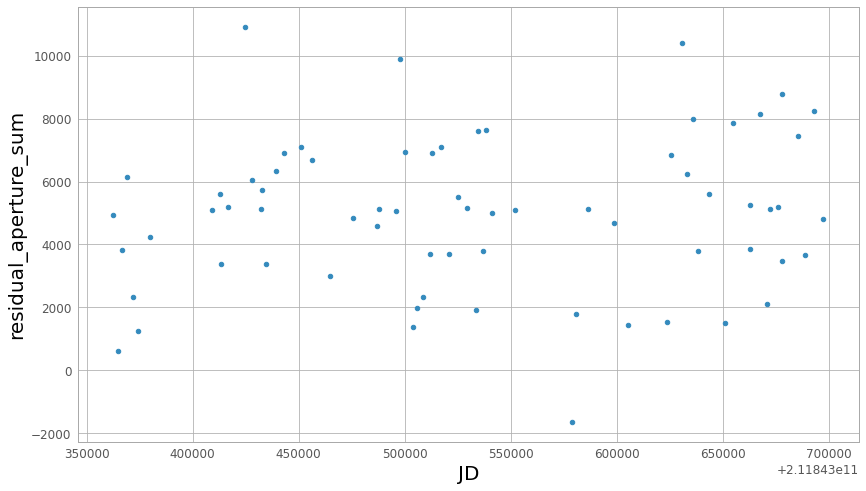

In [66]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

y1 = df["residual_aperture_sum"]
x1 = df["JD"]
ax.set_xlabel('JD', fontsize=20)
ax.set_ylabel('residual_aperture_sum',fontsize=20)

ax.scatter(x1,y1,s=20)

# def objective(x, a, b, c):
#     return a * np.sin(b*x) + c

# popt, _ = optimize.curve_fit(objective, x1, y1)

# a, b, c = popt

# x_new = np.arange(df['JD'].min(),df['JD'].max(), 10000)
# y_new = objective(x_new, a, b, c)

# ax.scatter(x_new,y_new)

